<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH15EJ1 *Bagging*

En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con técnicas de *bagging*. Trabajaremos con el paquete R neuralnet y con el juego de datos [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29).

## 1. Instalar los packages necesarios

Para empezar, cargamos todos los paquetes que van a ser utilizados a lo largo del ejercicio.

In [1]:
if(!require(mlbench)){
    install.packages('mlbench',repos='http://cran.es.r-project.org')
    require(mlbench)
}
if(!require(car)){
    install.packages('car',repos='http://cran.es.r-project.org')
    require(car)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(caretEnsemble)){
    install.packages('caretEnsemble',repos='http://cran.es.r-project.org')
    require(caretEnsemble)
}
if(!require(e1071)){
    install.packages('e1071',repos='http://cran.es.r-project.org')
    require(e1071)
}
if(!require(rpart)){
    install.packages('rpart',repos='http://cran.es.r-project.org')
    require(rpart)
}
if(!require(ipred)){
    install.packages('ipred',repos='http://cran.es.r-project.org')
    require(ipred)
}
if(!require(plyr)){
    install.packages('plyr',repos='http://cran.es.r-project.org')
    require(plyr)
}
set.seed(17)

Loading required package: mlbench

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘mlbench’”
Installing package into ‘/home/xavier/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Loading required package: mlbench

Loading required package: car

Loading required package: carData

Loading required package: caret

Loading required package: lattice

Loading required package: ggplot2

Loading required package: caretEnsemble

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caretEnsemble’”
Installing package into ‘/home/xavier/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Loading required package: caretEnsemble


Attaching package: ‘caretEnsemble’


The following object is masked from ‘package:ggplot2’:

    autoplot


Loading required package: e1071

Loading required package: rpart

Loading requir

## 2. Manipulación y preparación de los datos

Leemos el fichero de datos y vemos que consiste en 11 variables, y en la documentación vemos que estas corresponden a:

- 1: Identificador de la muestra
- 2-10: Diferentes medidas del tamaño y forma del núcleo de las células
- 11: Diagnóstico (2 = benogno, 4 = maligno)

In [12]:
wdbc <- read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
    sep=",",
    header=FALSE
)

dim(wdbc)
head(wdbc)

[1] 699  11

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4


### Preparamos los datos para crear el modelo

1. Sustituimos los valores `?` por `NA`

In [14]:
wdbc$V7 <- as.numeric(recode(wdbc$V7, "'?'=NA"))

2. Eliminamos los registros con datos incompletos

In [15]:
wdbc <- wdbc[complete.cases(wdbc),]

In [16]:
dataset <- wdbc[, 2:11]

## 3. Creación del modelo

### Parámetros de creación del modelo

Definimos un _cross validation_ con 3 repeticiones y 10 _folds_

In [17]:
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)

### Creamos un primer modelo de árbol

La métrica que usaremos para la evaluación del modelo será `Accuracy`

In [18]:
model.cart <- train(as.factor(V11)~., data=dataset, method="rpart", metric="Accuracy", trControl=control)

### Matriz de confusión

In [20]:
confusionMatrix(model.cart)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    2    4
         2 61.7  3.1
         4  3.3 31.9
                            
 Accuracy (average) : 0.9361


###  Mostramos las características del modelo

In [21]:
print(model.cart)

CART 

683 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 615, 614, 615, 615, 614, 615, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.02092050  0.9360739  0.8598576
  0.05439331  0.9179999  0.8211357
  0.79079498  0.8436820  0.6037023

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.0209205.


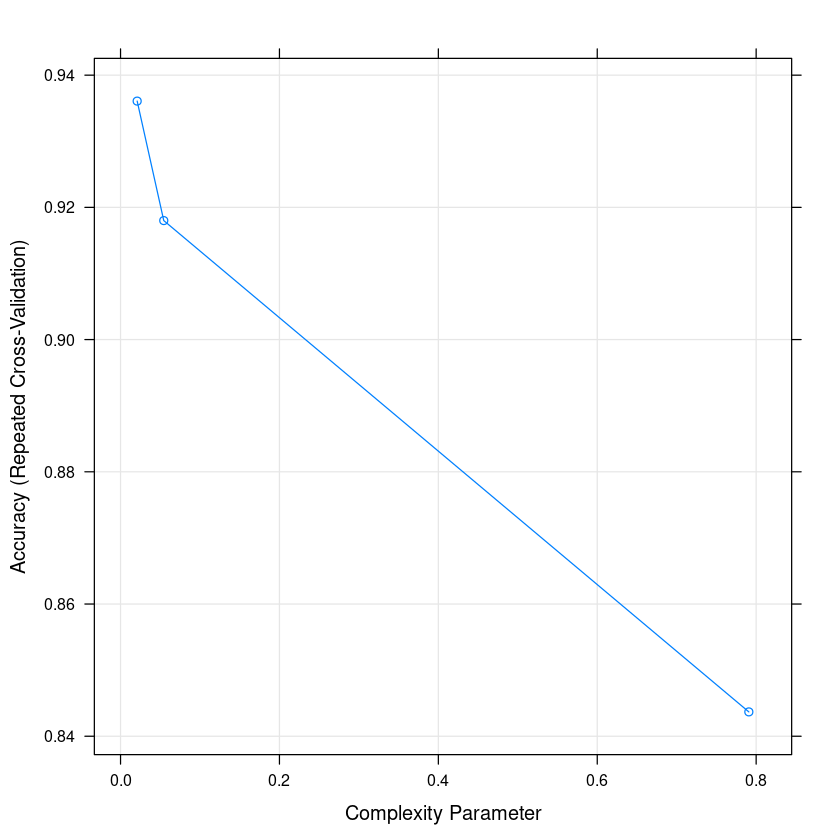

In [22]:
plot(model.cart)

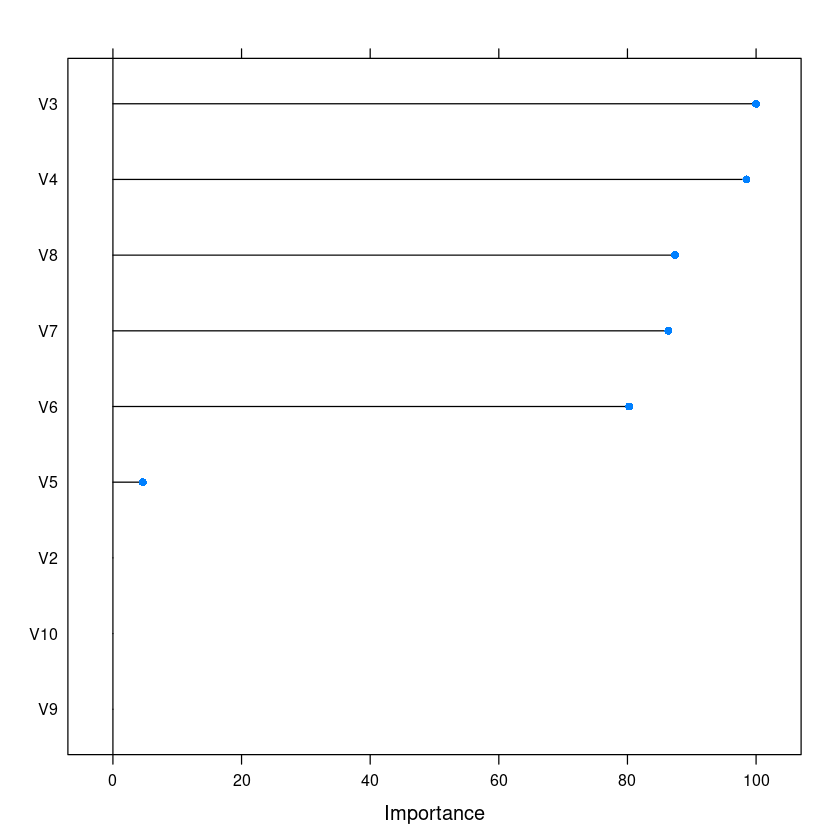

In [24]:
ctreeVarImp = varImp(model.cart)
plot(ctreeVarImp)

## 4. Creación de un árbol con el método *bagged*

In [26]:
model.treebag <- train(as.factor(V11)~., data=dataset, method="treebag", metric="Accuracy", trControl=control)

### Matriz de confusión

In [27]:
confusionMatrix(model.treebag)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    2    4
         2 62.7  1.9
         4  2.3 33.1
                            
 Accuracy (average) : 0.9585


###  Mostramos todas sus características.

In [28]:
print(model.treebag)

Bagged CART 

683 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 614, 615, 615, 615, 615, 615, ... 
Resampling results:

  Accuracy   Kappa    
  0.9585172  0.9093334



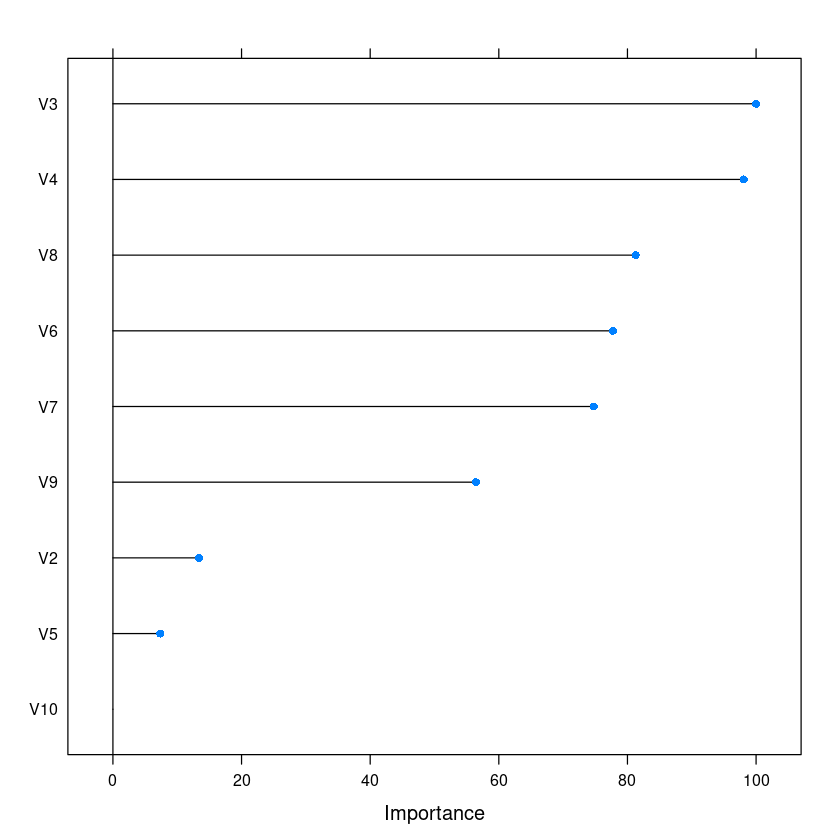

In [30]:
ctreeVarImp = varImp(model.treebag)
plot(ctreeVarImp)

## 5. Sumarizamos y comparamos los datos de ambos modelos

In [35]:
bagging_results <- resamples(list(treebag=model.treebag, cart=model.cart))
summary(bagging_results)


Call:
summary.resamples(object = bagging_results)

Models: treebag, cart 
Number of resamples: 30 

Accuracy 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
treebag 0.8840580 0.9453277 0.9565217 0.9585172 0.9710145 0.9855072    0
cart    0.8676471 0.9256475 0.9411765 0.9360739 0.9558824 1.0000000    0

Kappa 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
treebag 0.7540107 0.8813096 0.9059860 0.9093334 0.9361111 0.9683631    0
cart    0.7182320 0.8334330 0.8665969 0.8598576 0.9017769 1.0000000    0


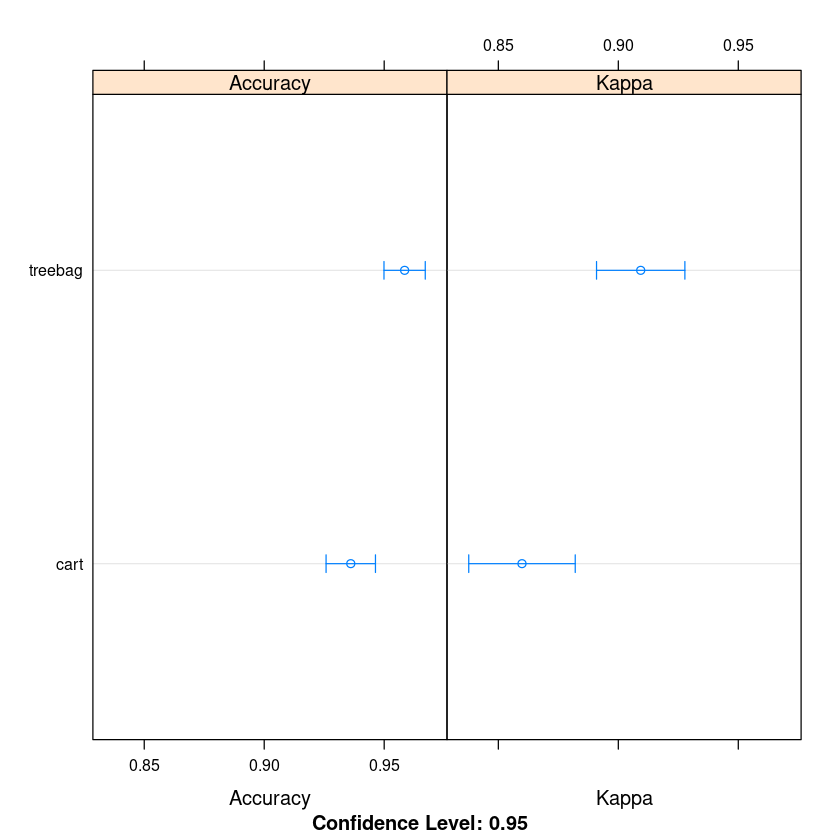

In [33]:
dotplot(bagging_results)